In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('echocardiogram.csv', error_bad_lines=False,na_values="?")

In [3]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


# Exploring  data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
survival                 130 non-null float64
still-alive              131 non-null float64
age-at-heart-attack      126 non-null float64
pericardial-effusion     132 non-null float64
fractional-shortening    124 non-null float64
epss                     117 non-null float64
lvdd                     121 non-null float64
wall-motion-score        128 non-null float64
wall-motion-index        130 non-null float64
mult                     129 non-null float64
name                     131 non-null object
group                    110 non-null object
alive-at-1               75 non-null float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB


In [5]:
df.drop(['group','name','mult'],axis=1,inplace=True)

In [6]:
df.shape

(133, 10)

In [7]:
ProfileReport(df)

Number of variables,10
Number of observations,133
Total Missing (%),8.7%
Total size in memory,10.5 KiB
Average record size in memory,80.6 B
Numeric,10
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# processing  data

In [8]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.0


In [9]:
#Find out how many nan values ​​ in the data
df.isnull().sum()

survival                  3
still-alive               2
age-at-heart-attack       7
pericardial-effusion      1
fractional-shortening     9
epss                     16
lvdd                     12
wall-motion-score         5
wall-motion-index         3
alive-at-1               58
dtype: int64

In [10]:
#survival -- the number of months patient survived (has survived,
#  if patient is still alive).  Because all the patients
#  had their heart attacks at different times, it is 
#  possible that some patients have survived less than
#  one year but they are still alive.  Check the second
#  variable to confirm this.  Such patients cannot be 
#  used for the prediction task mentioned above.
# 
df['survival'].describe()

count    130.000000
mean      22.182923
std       15.858267
min        0.030000
25%        7.875000
50%       23.500000
75%       33.000000
max       57.000000
Name: survival, dtype: float64

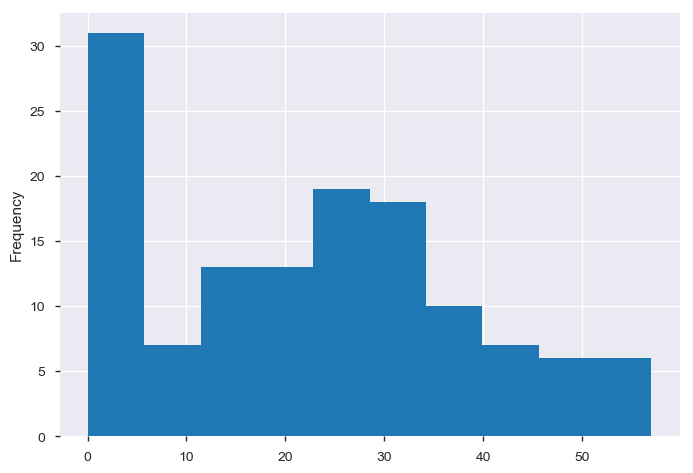

In [11]:
df['survival'].plot(kind='hist')

In [12]:
df['survival'].fillna(22.18,inplace=True)

In [13]:
df['still-alive']=pd.Categorical(df['still-alive'])

In [14]:
df['still-alive'].value_counts()

0.0    88
1.0    43
Name: still-alive, dtype: int64

In [15]:
df['still-alive'].fillna(0.0, inplace=True)

In [16]:
df['still-alive'].value_counts()

0.0    90
1.0    43
Name: still-alive, dtype: int64

In [17]:
df['age-at-heart-attack'].describe()

count    126.000000
mean      62.813722
std        8.342110
min       35.000000
25%       57.000000
50%       62.000000
75%       67.750000
max       86.000000
Name: age-at-heart-attack, dtype: float64

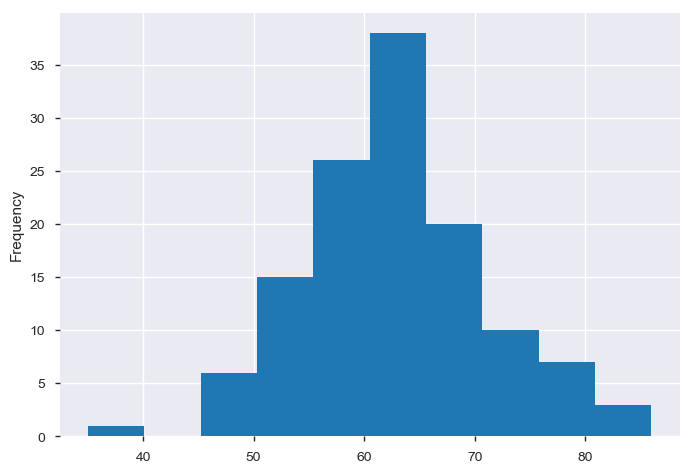

In [18]:
df['age-at-heart-attack'].plot(kind='hist')

In [19]:
df['age-at-heart-attack'].fillna(62.000,inplace=True)

In [20]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.0


In [21]:
df['pericardial-effusion'].value_counts()

0.0     107
1.0      24
77.0      1
Name: pericardial-effusion, dtype: int64

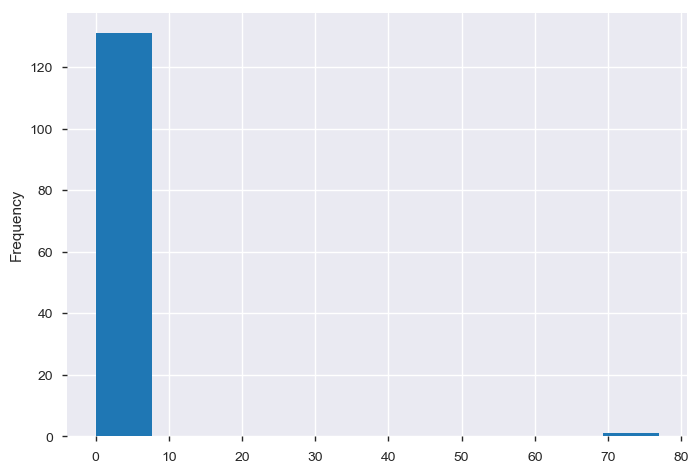

In [22]:
df['pericardial-effusion'].plot(kind='hist')

In [23]:
df['pericardial-effusion'].replace(77.0,np.nan,inplace=True)

In [24]:
df['pericardial-effusion'].fillna(0.0,inplace=True)

In [25]:
df['pericardial-effusion']=pd.Categorical(df['pericardial-effusion'])

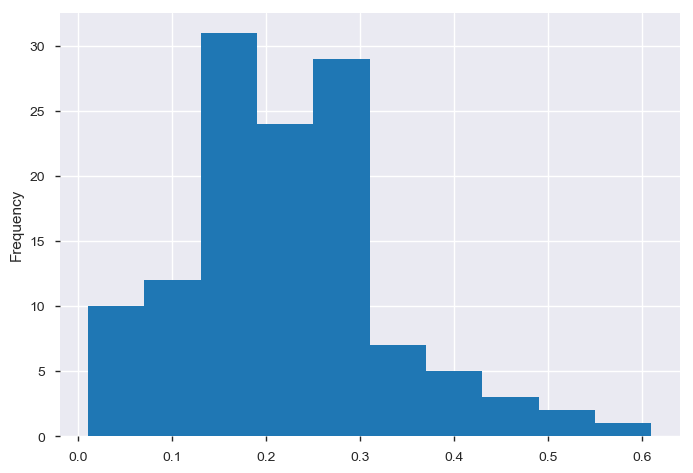

In [26]:
df['fractional-shortening'].plot(kind='hist')

In [27]:
df['fractional-shortening'].describe()

count    124.000000
mean       0.216734
std        0.107513
min        0.010000
25%        0.150000
50%        0.205000
75%        0.270000
max        0.610000
Name: fractional-shortening, dtype: float64

In [28]:
df['fractional-shortening'].fillna(0.216,inplace=True)

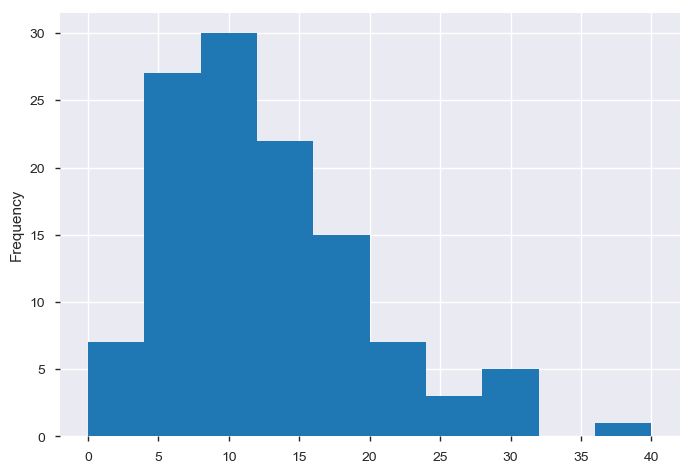

In [29]:
df['epss'].plot(kind='hist')

In [30]:
df['epss'].describe()

count    117.000000
mean      12.164769
std        7.370159
min        0.000000
25%        7.000000
50%       11.000000
75%       16.100000
max       40.000000
Name: epss, dtype: float64

In [31]:
df['epss'].fillna(11.000,inplace=True)

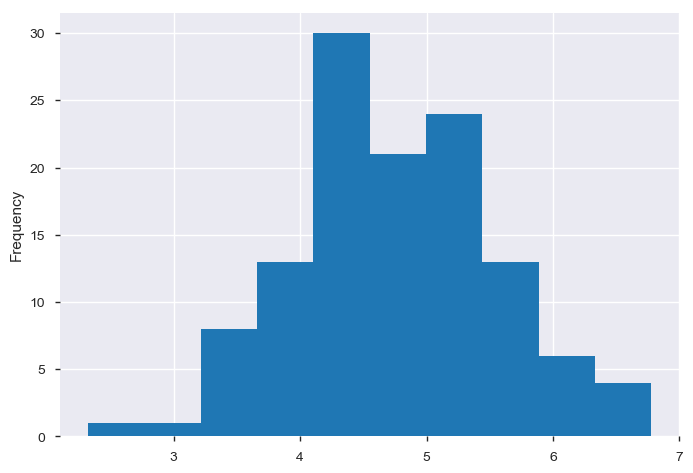

In [32]:
df['lvdd'].plot(kind='hist')

In [33]:
df['lvdd'].describe()

count    121.000000
mean       4.763157
std        0.810013
min        2.320000
25%        4.230000
50%        4.650000
75%        5.300000
max        6.780000
Name: lvdd, dtype: float64

In [34]:
df['lvdd'].fillna(4.763,inplace=True)

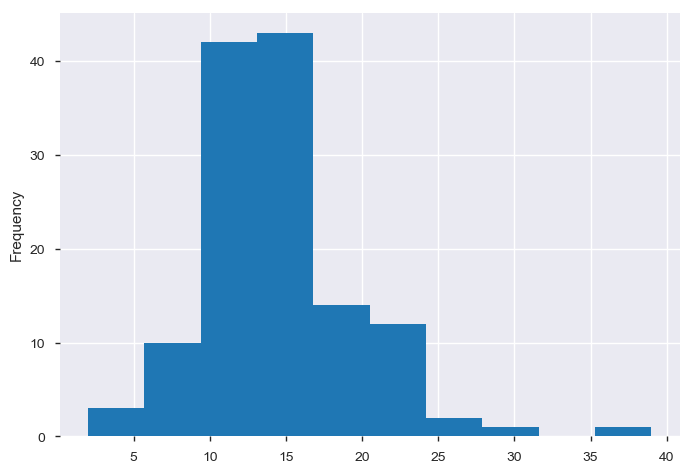

In [35]:
df['wall-motion-score'].plot(kind='hist')

In [36]:
df['wall-motion-score'].describe()

count    128.000000
mean      14.438125
std        5.018566
min        2.000000
25%       11.000000
50%       14.000000
75%       16.500000
max       39.000000
Name: wall-motion-score, dtype: float64

In [37]:
df['wall-motion-score'].fillna(14.000,inplace=True)

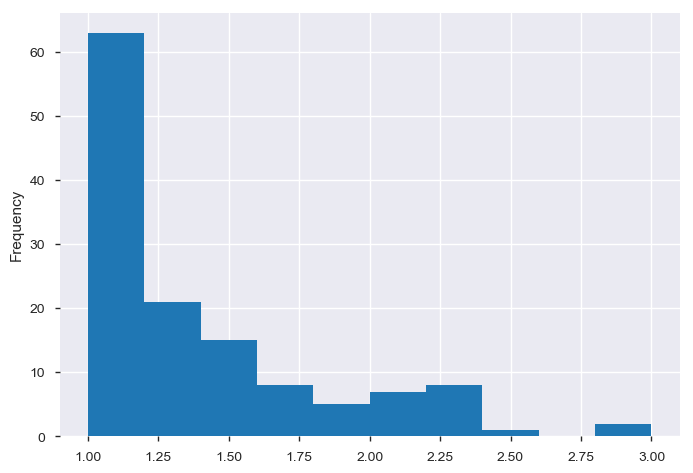

In [38]:
df['wall-motion-index'].plot(kind='hist')

In [39]:
#quals wall-motion-score divided by number of
#  segments seen.  Usually 12-13 segments are seen
#   in an echocardiogram.  Use this variable INSTEAD
#  of the wall motion score, so i will delete it
df.drop('wall-motion-index',axis=1,inplace=True)

In [40]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,0.0


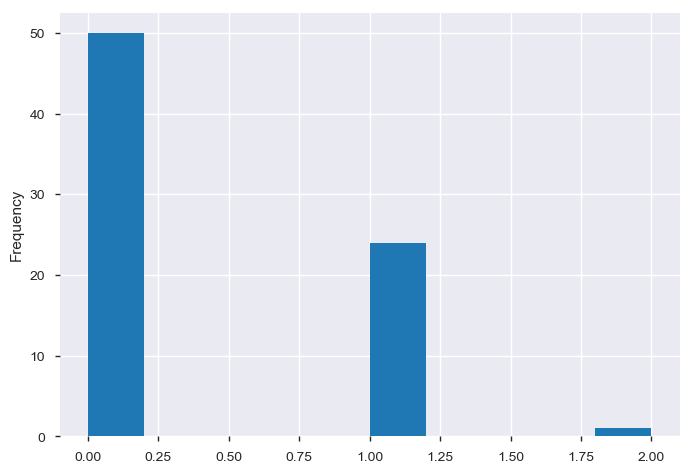

In [41]:
df['alive-at-1'].plot(kind='hist')

In [42]:
#alive-at-1 has 58 / 43.6% missing values 
#alive-at-1 has 50 / 37.6% zeros
#so i have to drop it Because of the large number of missing values
df.drop('alive-at-1',axis=1,inplace= True)

# visualizing  and explore data analysis

In [43]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0


In [44]:
def line(x,n):
    plt.figure(figsize=(20,8))
    plt.subplot(2,3,n)
    df[x].plot()

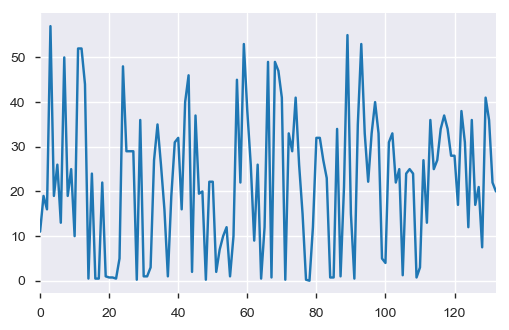

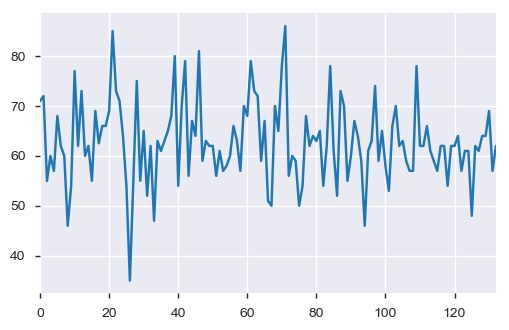

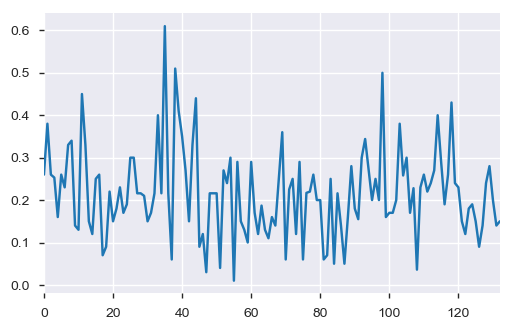

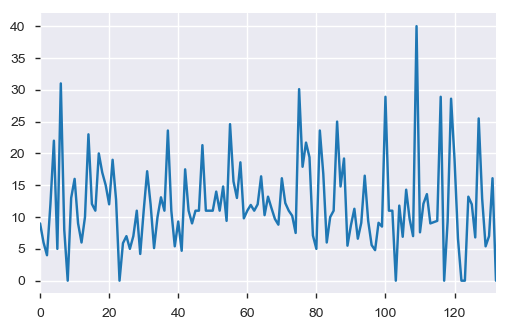

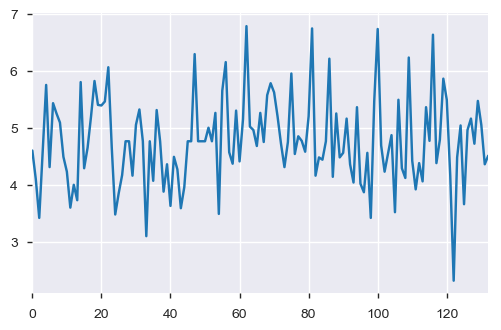

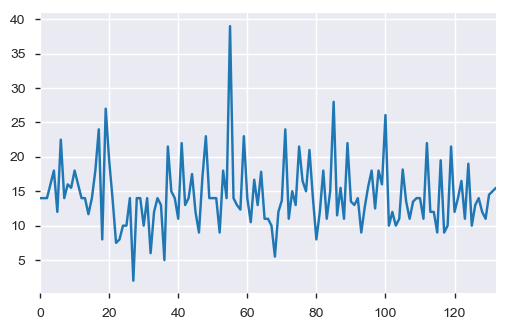

In [45]:
line('survival',1)
plt.title='survival'
line('age-at-heart-attack',2)
line('fractional-shortening',3)
line('epss',4)
line('lvdd',5)
line('wall-motion-score',6)

In [46]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0


In [47]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [48]:
df['survival'].iplot(kind='scatter',mode='markers',size=10)

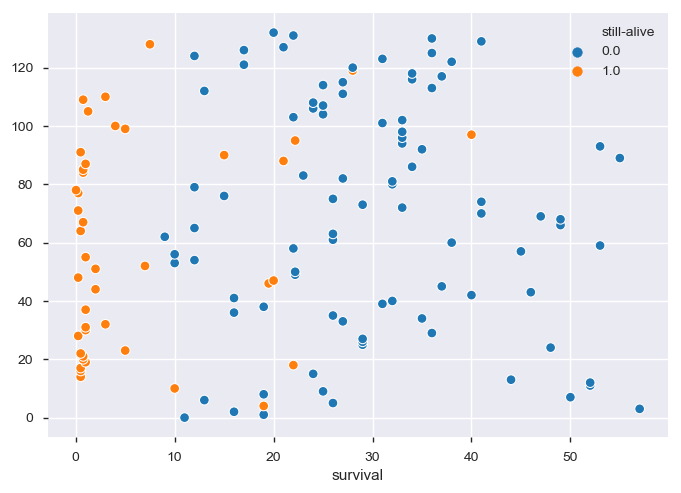

In [49]:
sns.scatterplot(x= df['survival'],y=df.index,hue='still-alive',data=df)

In [50]:
(df['survival'][df['still-alive']==1]).describe()

count    43.000000
mean      6.301395
std       9.473917
min       0.030000
25%       0.625000
50%       1.000000
75%       7.250000
max      40.000000
Name: survival, dtype: float64

In [51]:
(df['survival'][df['still-alive']==0]).describe()

count    90.000000
mean     29.770667
std      11.919473
min       9.000000
25%      22.000000
50%      29.000000
75%      36.000000
max      57.000000
Name: survival, dtype: float64

In [52]:
(df['survival'][df['still-alive']==0]).describe()

count    90.000000
mean     29.770667
std      11.919473
min       9.000000
25%      22.000000
50%      29.000000
75%      36.000000
max      57.000000
Name: survival, dtype: float64

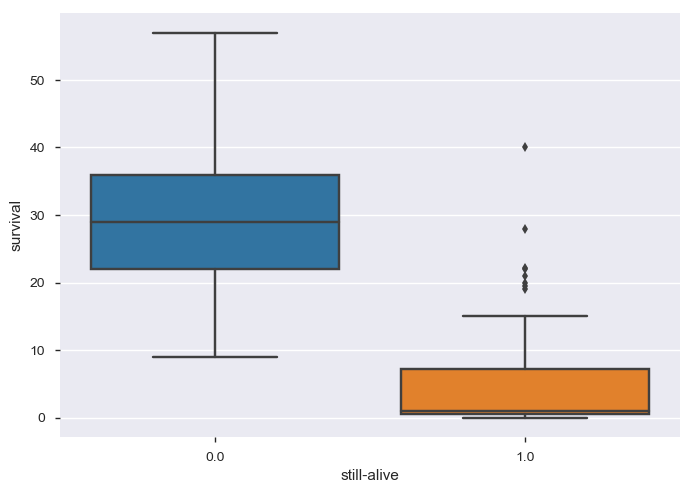

In [53]:
sns.boxplot(y='survival', x='still-alive',data=df)

 Now we can see that most of the time the patient does not live more than 10 months 

In [54]:
df['age-at-heart-attack'].iplot(kind='scatter')

In [55]:
df['age-at-heart-attack'].iplot(kind='scatter',mode='markers',size=10)

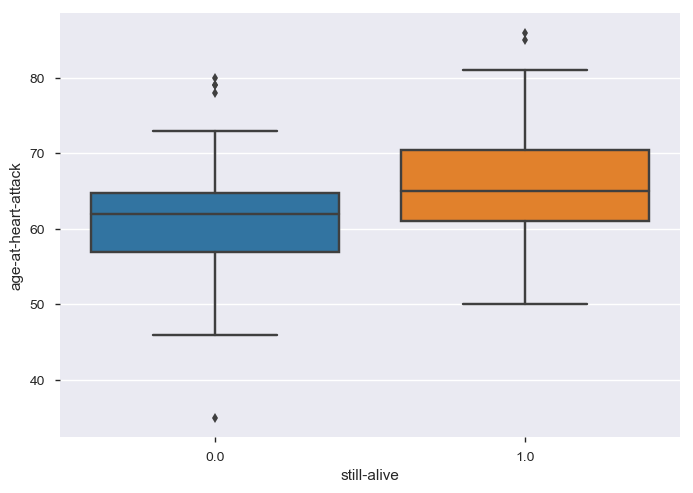

In [56]:
sns.boxplot(x='still-alive',y='age-at-heart-attack',data=df)

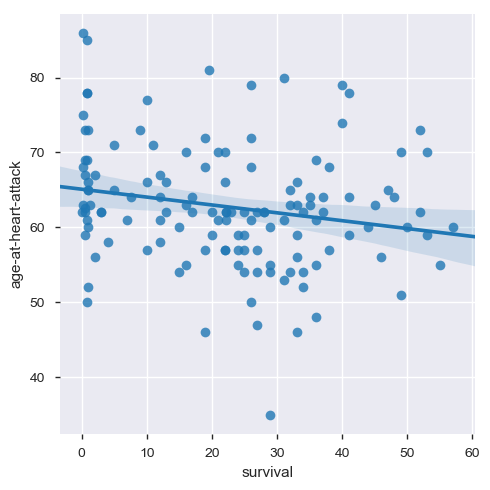

In [57]:
sns.lmplot(x='survival',y='age-at-heart-attack',data=df)

Now we can see that if the patient had a heart attack at an older age, the number of months the patient would survive would decrease.

In [58]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0


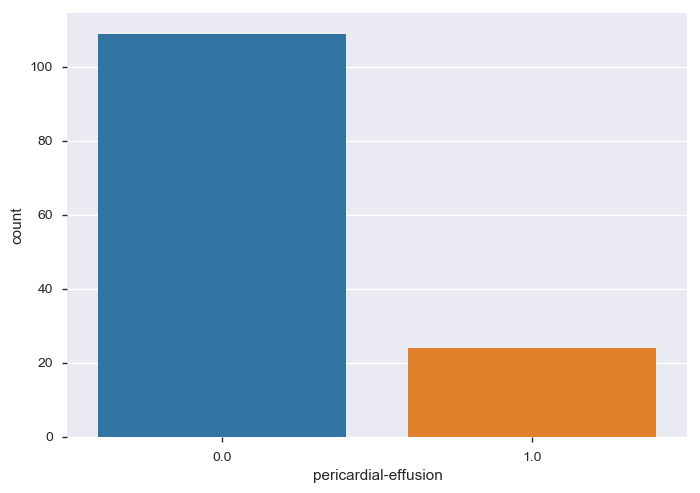

In [59]:
sns.countplot(df['pericardial-effusion'])

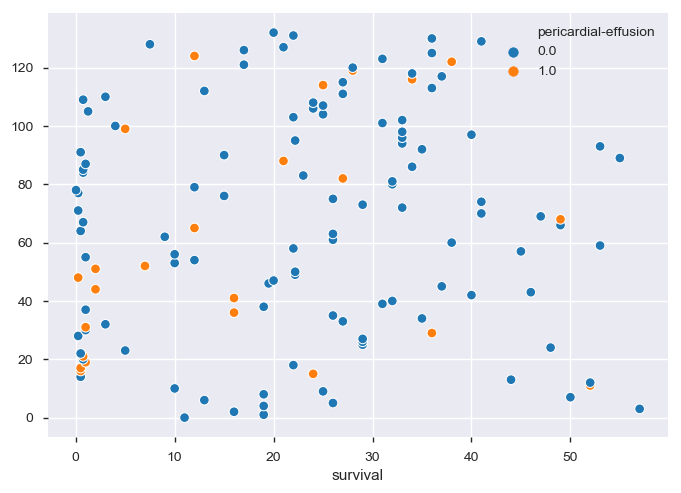

In [60]:
sns.scatterplot(x= df['survival'],y=df.index,hue='pericardial-effusion',data=df)

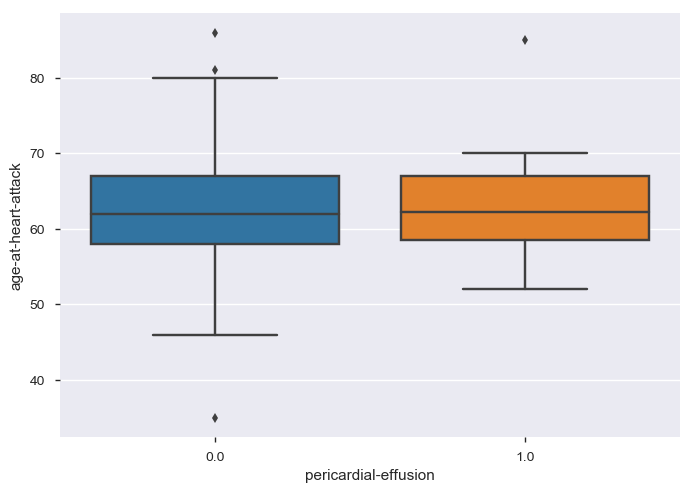

In [61]:
sns.boxplot(x='pericardial-effusion',y='age-at-heart-attack',data=df)

In [62]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0


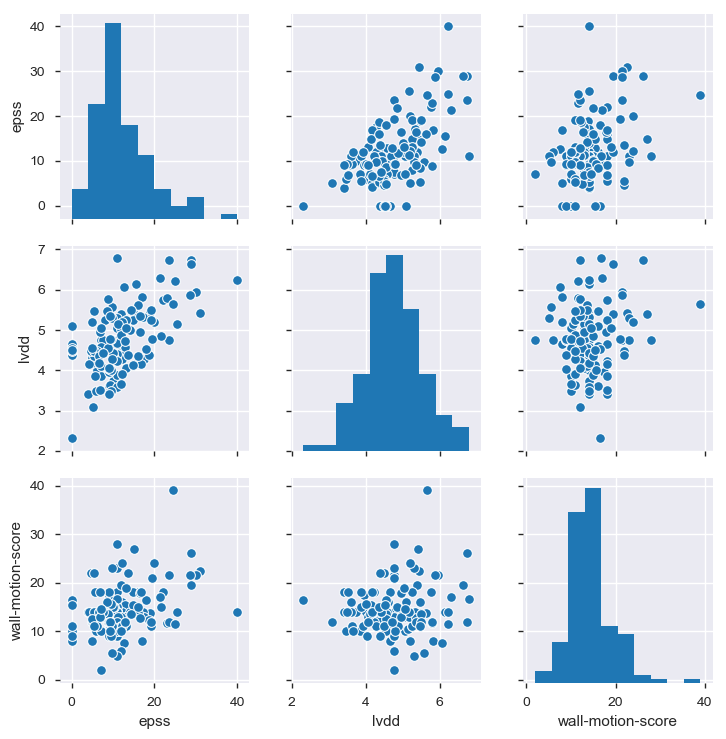

In [63]:
sns.pairplot(df[['epss','lvdd','wall-motion-score']])

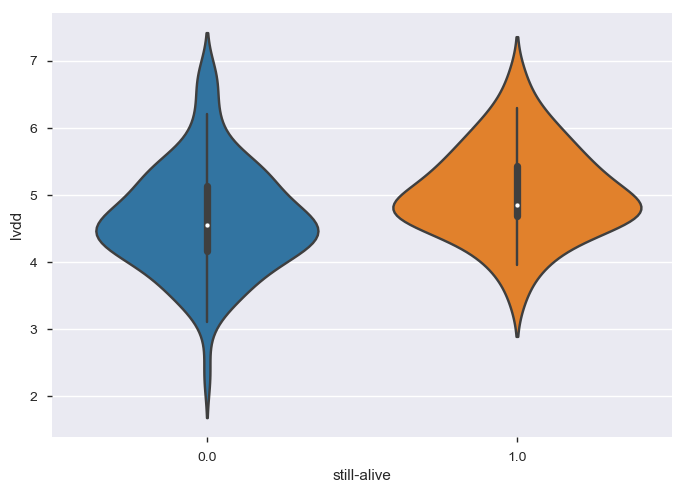

In [64]:
sns.violinplot(y=df['lvdd'],x=df['still-alive'])

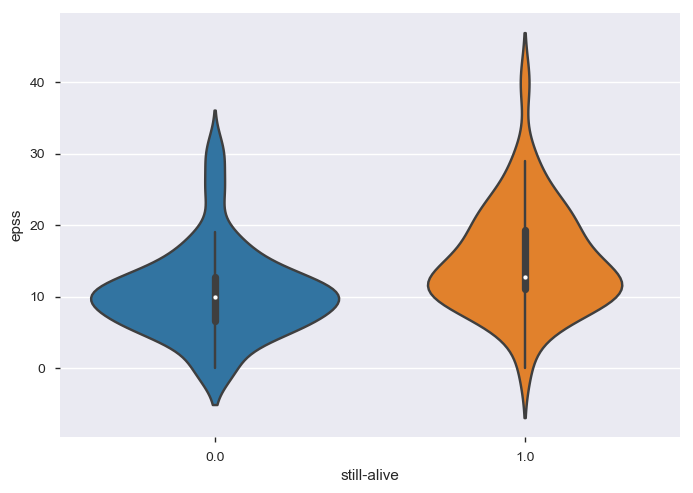

In [65]:
sns.violinplot(y=df['epss'],x=df['still-alive'])

E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

E:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



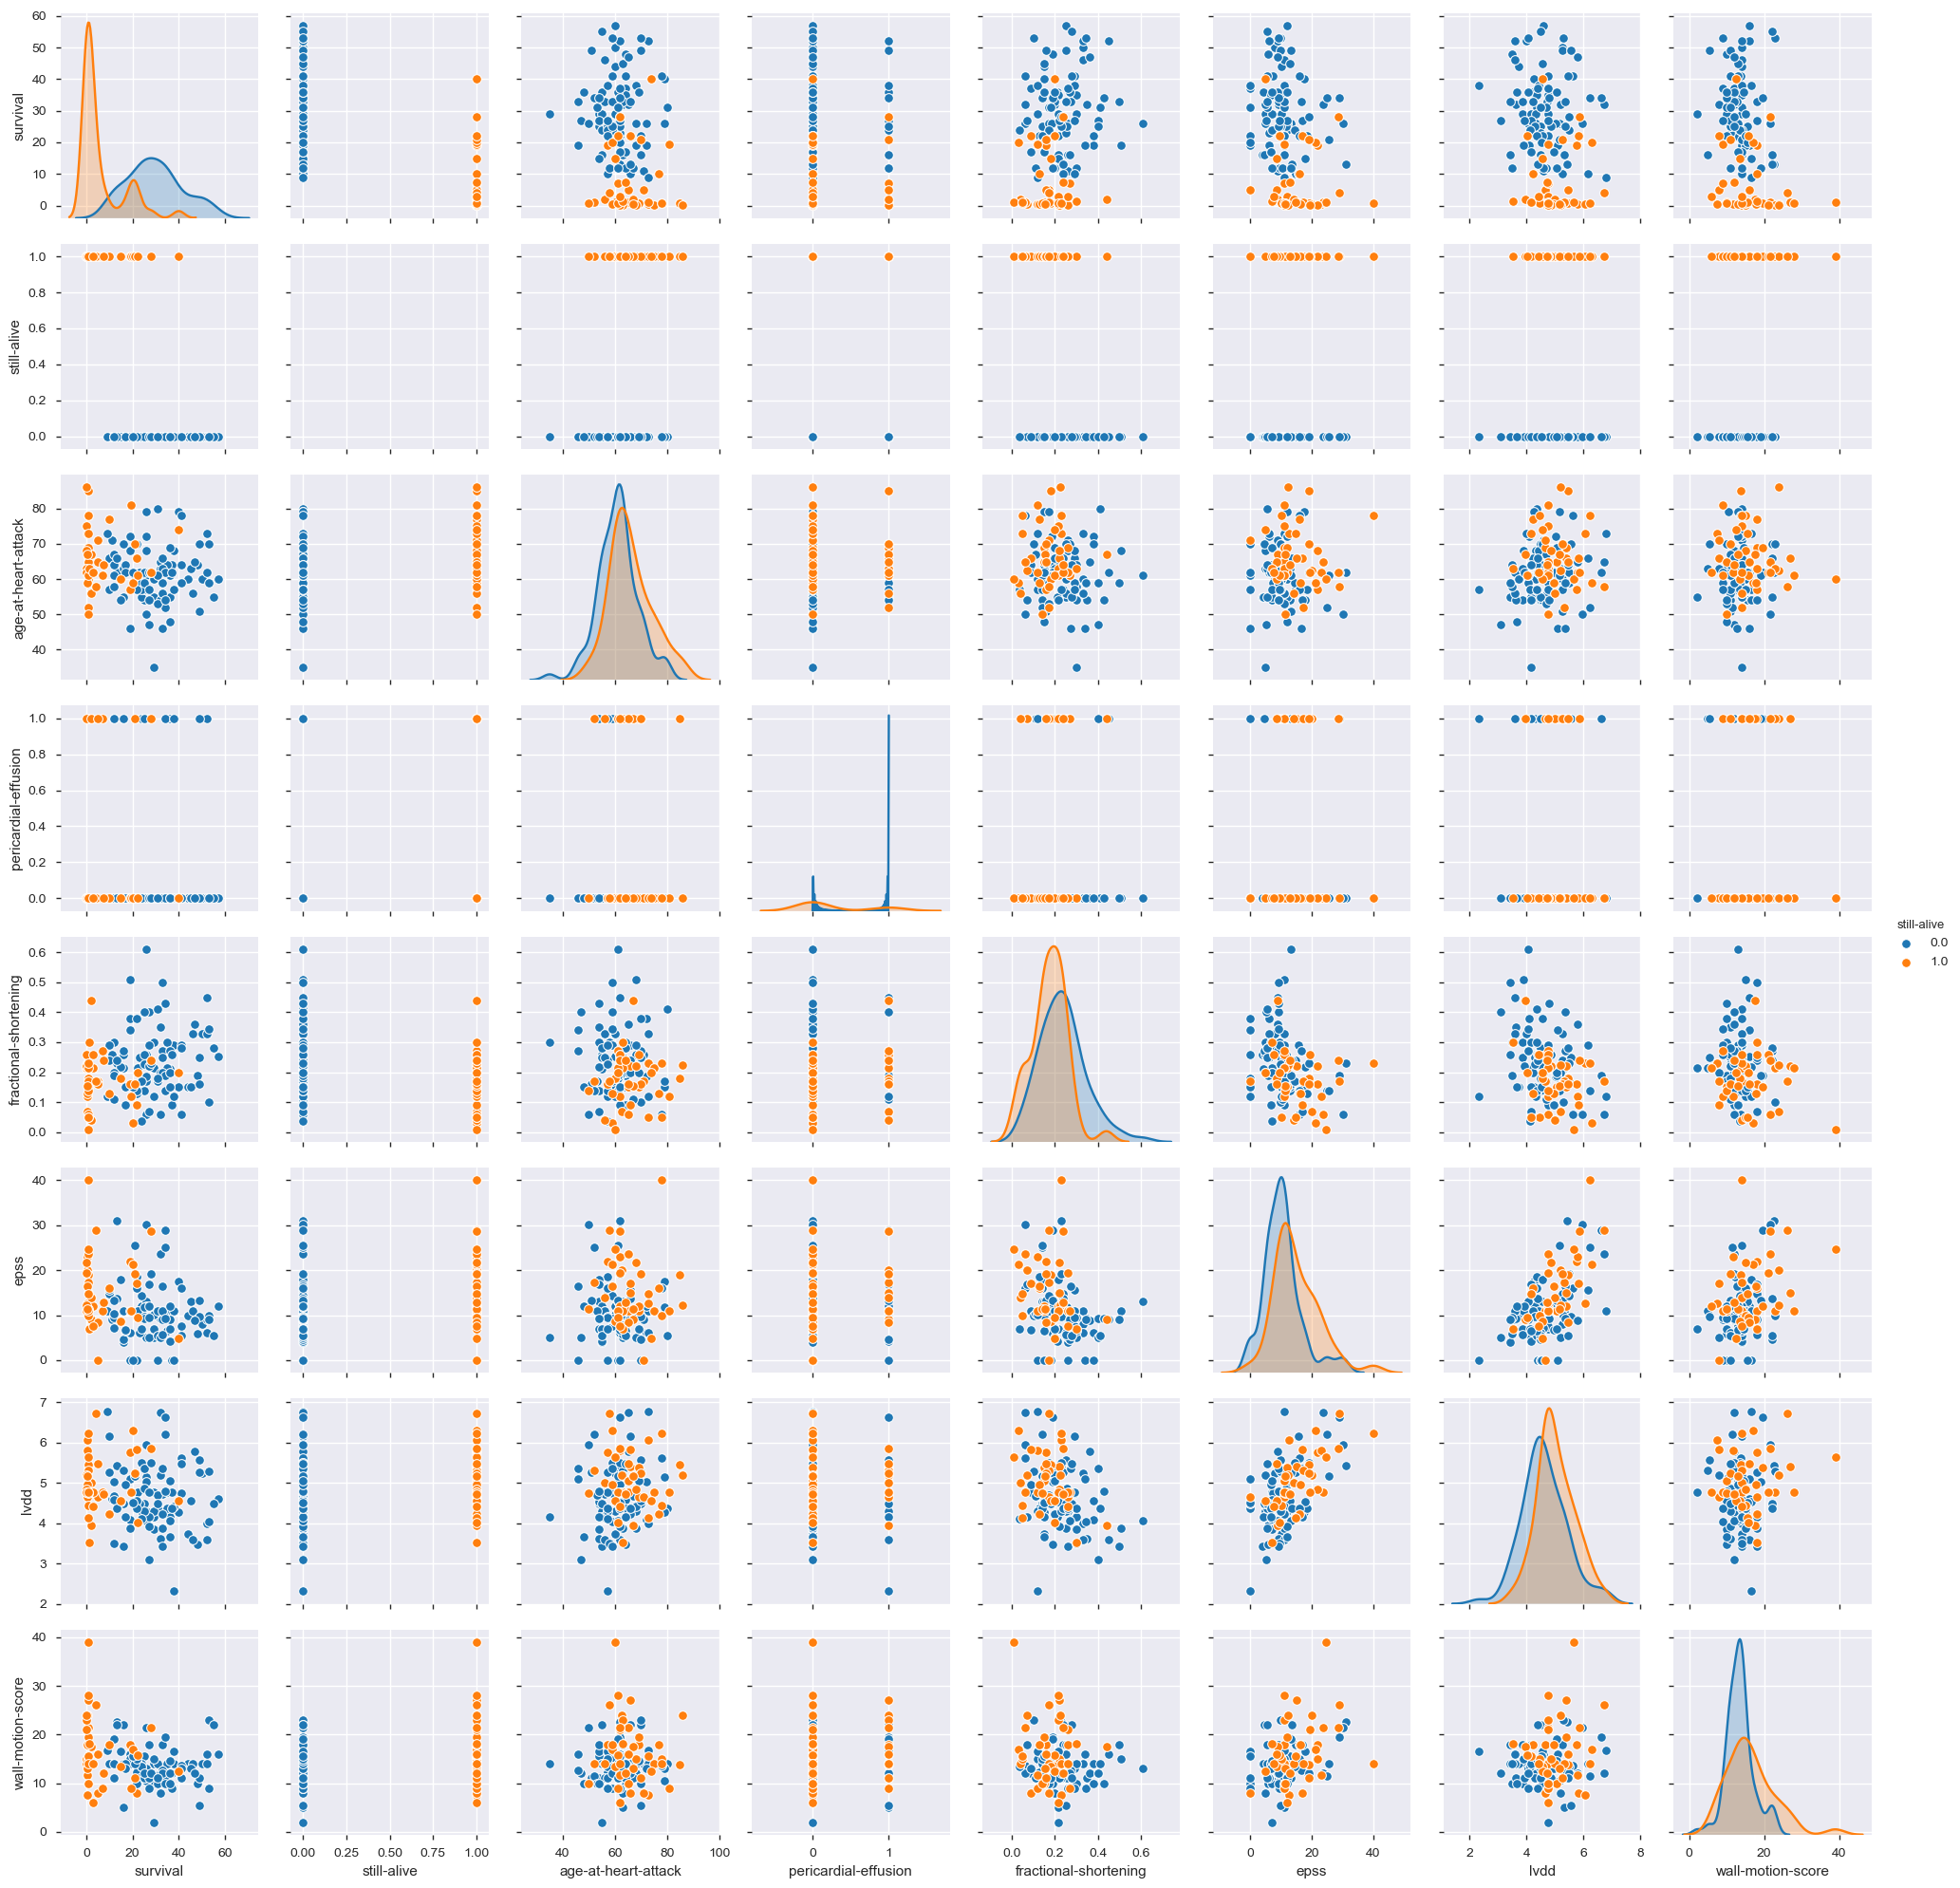

In [66]:
sns.pairplot(df,hue='still-alive')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 8 columns):
survival                 133 non-null float64
still-alive              133 non-null category
age-at-heart-attack      133 non-null float64
pericardial-effusion     133 non-null category
fractional-shortening    133 non-null float64
epss                     133 non-null float64
lvdd                     133 non-null float64
wall-motion-score        133 non-null float64
dtypes: category(2), float64(6)
memory usage: 6.8 KB


In [68]:
df['still-alive']=df['still-alive'].astype(float)
df['pericardial-effusion']=df['pericardial-effusion'].astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 8 columns):
survival                 133 non-null float64
still-alive              133 non-null float64
age-at-heart-attack      133 non-null float64
pericardial-effusion     133 non-null float64
fractional-shortening    133 non-null float64
epss                     133 non-null float64
lvdd                     133 non-null float64
wall-motion-score        133 non-null float64
dtypes: float64(8)
memory usage: 8.4 KB


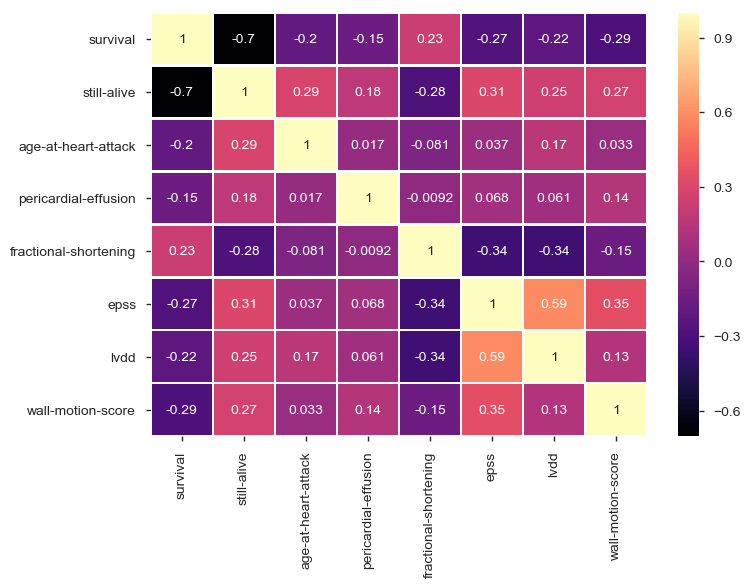

In [70]:
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [71]:
# There is a high correlation between epss and lvdd so a will drop one of them
df.drop('epss',axis=1,inplace=True)

In [72]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,lvdd,wall-motion-score
0,11.0,0.0,71.0,0.0,0.260,4.600,14.0
1,19.0,0.0,72.0,0.0,0.380,4.100,14.0
2,16.0,0.0,55.0,0.0,0.260,3.420,14.0
3,57.0,0.0,60.0,0.0,0.253,4.603,16.0
4,19.0,1.0,57.0,0.0,0.160,5.750,18.0


# working with out liers

In [73]:
'''
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df=remove_outlier(df)
'''

'\nfrom pandas.api.types import is_numeric_dtype\ndef remove_outlier(df):\n    low = .05\n    high = .95\n    quant_df = df.quantile([low, high])\n    for name in list(df.columns):\n        if is_numeric_dtype(df[name]):\n            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]\n    return df\n\ndf=remove_outlier(df)\n'

# spliting the dataset into training set and test set

In [74]:
x=df.drop('still-alive',axis=1)
y=df['still-alive']

In [75]:
x.head()

,survival,age-at-heart-attack,pericardial-effusion,fractional-shortening,lvdd,wall-motion-score
0,11.0,71.0,0.0,0.260,4.600,14.0
1,19.0,72.0,0.0,0.380,4.100,14.0
2,16.0,55.0,0.0,0.260,3.420,14.0
3,57.0,60.0,0.0,0.253,4.603,16.0
4,19.0,57.0,0.0,0.160,5.750,18.0


In [76]:
#y=  pd.DataFrame(y)

In [77]:
#y.head()

In [78]:
#x['pericardial-effusion']=x['pericardial-effusion'].astype(float)

In [79]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(x,y, test_size = 0.2 , random_state=0)

In [80]:
X_train.head()

,survival,age-at-heart-attack,pericardial-effusion,fractional-shortening,lvdd,wall-motion-score
129,41.0,64.0,0.0,0.280,5.47,11.0
107,25.0,57.0,0.0,0.228,4.29,11.0
125,36.0,48.0,0.0,0.150,3.66,10.0
33,27.0,47.0,0.0,0.400,3.10,12.0
68,49.0,70.0,1.0,0.250,5.57,5.5


# doing future scaling on data and prepare it for machine learning model

In [81]:
# feture scaling (x= (x-min(x))/ max x - min x)
from sklearn.preprocessing import StandardScaler
sc_X  = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [82]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


In [83]:
'''
X_train.columns=['survival',
'age-at-heart-attack',
'pericardial-effusion',
'fractional-shortening',
'lvdd',
'wall-motion-score']
X_test.columns=['survival',
'age-at-heart-attack',
'pericardial-effusion',
'fractional-shortening',
'lvdd',
'wall-motion-score']
'''

"\nX_train.columns=['survival',\n'age-at-heart-attack',\n'pericardial-effusion',\n'fractional-shortening',\n'lvdd',\n'wall-motion-score']\nX_test.columns=['survival',\n'age-at-heart-attack',\n'pericardial-effusion',\n'fractional-shortening',\n'lvdd',\n'wall-motion-score']\n"

In [84]:
X_test.head()

,0,1,2,3,4,5
0,0.801192,-2.258188,-0.49705,0.542903,0.880122,-0.319574
1,1.005435,0.797806,-0.49705,-0.122923,0.448243,0.042650
2,0.528867,-3.719750,-0.49705,0.801835,-0.777738,-0.056319
3,-0.151943,-2.258188,-0.49705,1.171739,0.503969,0.339555
4,-1.377401,0.266329,-0.49705,-0.585302,0.448243,-0.848065


In [85]:
X_train.head()

,0,1,2,3,4,5
0,1.345840,0.133460,-0.49705,0.616884,1.033370,-0.650128
1,0.256543,-0.796625,-0.49705,0.136009,-0.610559,-0.650128
2,1.005435,-1.992449,-0.49705,-0.585302,-1.488249,-0.848065
3,0.392705,-2.125318,-0.49705,1.726594,-2.268419,-0.452192
4,1.890488,0.930675,2.01187,0.339456,1.172686,-1.738780


# Using KNN
##### Import KNeighborsClassifier from scikit learn.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [89]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [90]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [91]:
pred = knn.predict(X_test)

In [92]:
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
confusion_matrix(y_test,pred)

array([[16,  2],
       [ 5,  4]], dtype=int64)

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        18
         1.0       0.67      0.44      0.53         9

   micro avg       0.74      0.74      0.74        27
   macro avg       0.71      0.67      0.68        27
weighted avg       0.73      0.74      0.72        27



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!


In [100]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

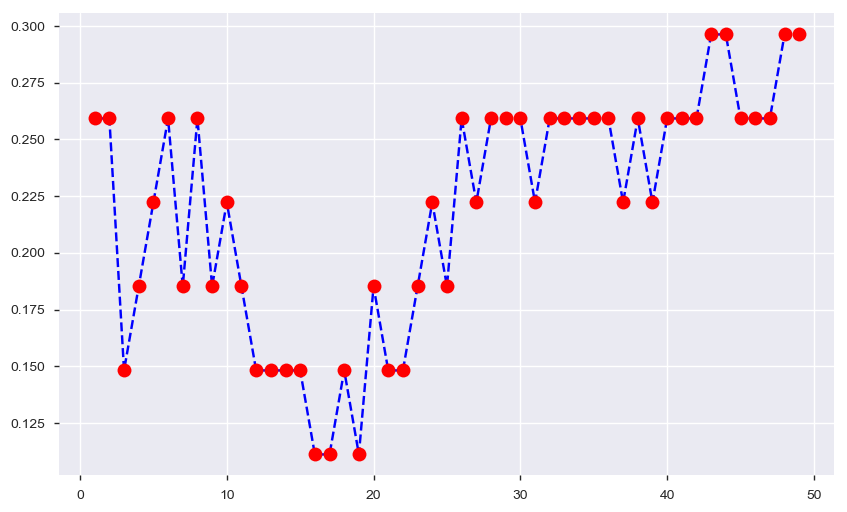

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')


## Retrain with new K Value
**The lowest error rate at k is 17**
**Retrain your model with the best K value and re-do the classification report and the confusion matrix.**

In [116]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[18  0]
 [ 3  6]]


              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        18
         1.0       1.00      0.67      0.80         9

   micro avg       0.89      0.89      0.89        27
   macro avg       0.93      0.83      0.86        27
weighted avg       0.90      0.89      0.88        27



In [117]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8888888888888888
